In [22]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
data = yf.download("^GSPC", start = "2000-12-31", end = "2020-12-31")

[*********************100%***********************]  1 of 1 completed


In [23]:
data["Change in Adj Close"] = data["Adj Close"].pct_change() + 1

In [24]:
data = data[data["Change in Adj Close"].notnull()].reset_index()

In [25]:
# Fully Invested: We assume that they invest $10,000 on the days before the market period opens

total = []
starting_sum = 10000
for i in range(len(data)):
    starting_sum *= data["Change in Adj Close"][i]
    total.append(starting_sum)
data["Fully Invested"] = total

In [26]:
# Missing Best 10 Days

total = []
starting_sum = 10000
top_ten_days = data.nlargest(10, columns = "Change in Adj Close")["Date"]
for i in range(len(data)):
    if i not in top_ten_days:
        starting_sum *= data["Change in Adj Close"][i]
    total.append(starting_sum)
data["Miss Ten Days"] = total

In [27]:
# Missing Best 20 Days

total = []
starting_sum = 10000
top_twenty_days = data.nlargest(20, columns = "Change in Adj Close")["Date"]
for i in range(len(data)):
    if i not in top_twenty_days:
        starting_sum *= data["Change in Adj Close"][i]
    total.append(starting_sum)
data["Miss Twenty Days"] = total

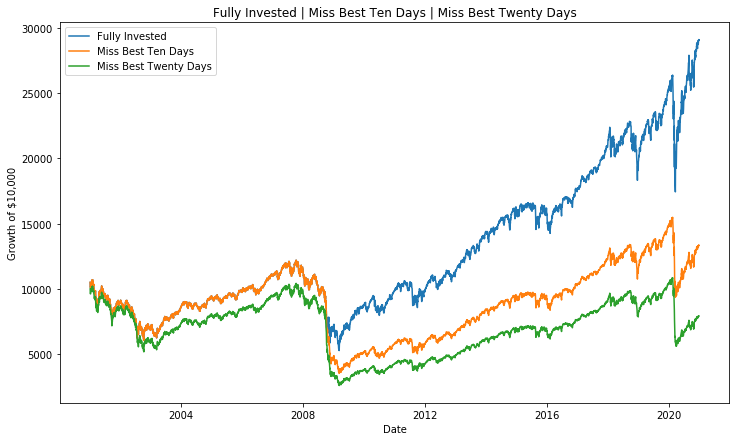

In [28]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = data, x ="Date", y ="Fully Invested", label = "Fully Invested")
sns.lineplot(data = data, x ="Date", y ="Miss Ten Days", label = "Miss Best Ten Days")
sns.lineplot(data = data, x ="Date", y ="Miss Twenty Days", label = "Miss Best Twenty Days")
plt.ylabel("Growth of $10,000")
plt.title("Fully Invested | Miss Best Ten Days | Miss Best Twenty Days")
plt.legend()
plt.show()

In [29]:
top_ten_years = top_ten_days.dt.year.unique()
top_ten_months = top_ten_days.dt.month.unique()
total = []
starting_sum = 10000

for i in range(len(data)):
    if data["Date"][i].year in top_ten_years and data["Date"][i].month in top_ten_months:
        total.append(starting_sum)
    else:
        starting_sum *= data["Change in Adj Close"][i]
        total.append(starting_sum)
data["Months with Top Ten Days"] = total

In [30]:
top_twenty_years = top_twenty_days.dt.year.unique()
top_twenty_months = top_twenty_days.dt.month.unique()
total = []
starting_sum = 10000

for i in range(len(data)):
    if data["Date"][i].year in top_twenty_years and data["Date"][i].month in top_twenty_months:
        total.append(starting_sum)
    else:
        starting_sum *= data["Change in Adj Close"][i]
        total.append(starting_sum)
data["Months with Top Twenty Days"] = total

In [31]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Change in Adj Close,Fully Invested,Miss Ten Days,Miss Twenty Days,Months with Top Ten Days,Months with Top Twenty Days
0,2001-01-03,1283.270020,1347.760010,1274.619995,1347.560059,1347.560059,1880700000,1.050099,10500.986060,10500.986060,10000.000000,10500.986060,10000.0
1,2001-01-04,1347.560059,1350.239990,1329.140015,1333.339966,1333.339966,2131000000,0.989448,10390.174675,10390.174675,9894.475258,10390.174675,10000.0
2,2001-01-05,1333.339966,1334.770020,1294.949951,1298.349976,1298.349976,1430800000,0.973758,10117.511949,10117.511949,9634.820855,10117.511949,10000.0
3,2001-01-08,1298.349976,1298.349976,1276.290039,1295.859985,1295.859985,1115500000,0.998082,10098.108470,10098.108470,9616.343087,10098.108470,10000.0
4,2001-01-09,1295.859985,1311.719971,1295.140015,1300.800049,1300.800049,1191300000,1.003812,10136.604370,10136.604370,9653.002406,10136.604370,10000.0


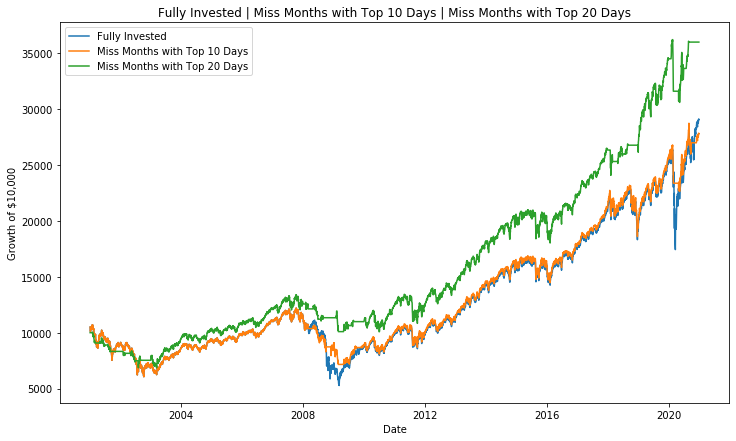

In [32]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = data, x ="Date", y ="Fully Invested", label = "Fully Invested")
sns.lineplot(data = data, x ="Date", y ="Months with Top Ten Days", label = "Miss Months with Top 10 Days")
sns.lineplot(data = data, x ="Date", y ="Months with Top Twenty Days", label = "Miss Months with Top 20 Days")
plt.title("Fully Invested | Miss Months with Top 10 Days | Miss Months with Top 20 Days")
plt.ylabel("Growth of $10,000")
plt.legend()
plt.show()

In [33]:
top_ten_years = top_ten_days.dt.year.unique()
total = []
starting_sum = 10000

for i in range(len(data)):
    if data["Date"][i].year not in top_ten_years:
        starting_sum *= data["Change in Adj Close"][i]
    total.append(starting_sum)
data["Years with Top Ten Days"] = total

In [34]:
top_twenty_years = top_twenty_days.dt.year.unique()
total = []
starting_sum = 10000

for i in range(len(data)):
    if data["Date"][i].year not in top_twenty_years:
        starting_sum *= data["Change in Adj Close"][i]
    total.append(starting_sum)
data["Years with Top Twenty Days"] = total

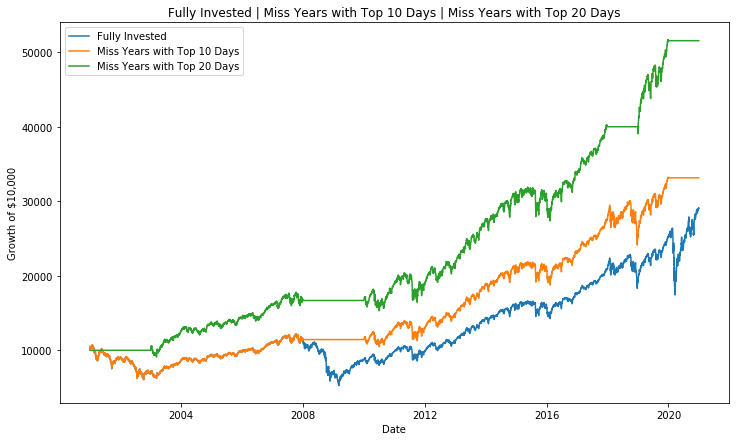

In [35]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = data, x ="Date", y ="Fully Invested", label = "Fully Invested")
sns.lineplot(data = data, x ="Date", y ="Years with Top Ten Days", label = "Miss Years with Top 10 Days")
sns.lineplot(data = data, x ="Date", y ="Years with Top Twenty Days", label = "Miss Years with Top 20 Days")
plt.title("Fully Invested | Miss Years with Top 10 Days | Miss Years with Top 20 Days")
plt.ylabel("Growth of $10,000")
plt.legend()
plt.show()

In [48]:
data.nlargest(20, columns = "Change in Adj Close")[["Date", "Change in Adj Close"]]

,Date,Change in Adj Close
1954,2008-10-13,1.115800
1965,2008-10-28,1.107890
4834,2020-03-24,1.093828
4827,2020-03-13,1.092871
2064,2009-03-23,1.070758
4843,2020-04-06,1.070331
1977,2008-11-13,1.069213
1984,2008-11-24,1.064723
2055,2009-03-10,1.063663
1983,2008-11-21,1.063248


In [46]:
data.nsmallest(20, columns = "Change in Adj Close")[["Date", "Change in Adj Close"]]

,Date,Change in Adj Close
4828,2020-03-16,0.880159
4826,2020-03-12,0.904887
1956,2008-10-15,0.909650
1988,2008-12-01,0.910705
1944,2008-09-29,0.911932
1952,2008-10-09,0.923833
4823,2020-03-09,0.924030
1982,2008-11-20,0.932877
2664,2011-08-08,0.933366
1981,2008-11-19,0.938844


In [50]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Change in Adj Close,Fully Invested,Miss Ten Days,Miss Twenty Days,Months with Top Ten Days,Months with Top Twenty Days,Years with Top Ten Days,Years with Top Twenty Days
0,2001-01-03,1283.270020,1347.760010,1274.619995,1347.560059,1347.560059,1880700000,1.050099,10500.986060,10500.986060,10000.000000,10500.986060,10000.0,10500.986060,10000.0
1,2001-01-04,1347.560059,1350.239990,1329.140015,1333.339966,1333.339966,2131000000,0.989448,10390.174675,10390.174675,9894.475258,10390.174675,10000.0,10390.174675,10000.0
2,2001-01-05,1333.339966,1334.770020,1294.949951,1298.349976,1298.349976,1430800000,0.973758,10117.511949,10117.511949,9634.820855,10117.511949,10000.0,10117.511949,10000.0
3,2001-01-08,1298.349976,1298.349976,1276.290039,1295.859985,1295.859985,1115500000,0.998082,10098.108470,10098.108470,9616.343087,10098.108470,10000.0,10098.108470,10000.0
4,2001-01-09,1295.859985,1311.719971,1295.140015,1300.800049,1300.800049,1191300000,1.003812,10136.604370,10136.604370,9653.002406,10136.604370,10000.0,10136.604370,10000.0
